In [1]:
import sys
sys.path.append('../datagen/')
from mitchellschaeffer_parallel import MitchellSchaeffer
import numpy as np
import os

sys.path.append('../particle/')
from generate_particle_parallel import ODEParams

/home/daan/.anaconda3/envs/pacs/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
num_samples = 4
num_processes = 4
grid_size = (20,20)

In [3]:
parameters = ODEParams(T=500, dt=0.5, u0=[0.0, 0.0], theta=0.5, tol=1e-2)

MS = MitchellSchaeffer(
    eqtype="ODE",
    params=parameters,
    k=8,
    alpha=0.15,
    epsilon=0.01,
    I=0.125,
    gamma=0.1,
    grid_size=grid_size,
)
MS.generate_dataset_parallel(num_samples, num_processes, plot=False)

Inside proc 1
Program finished in 82.54995398099891 seconds


In [6]:
# Merge the generated samples into a single file
merged_data = []

for sample_id in range(num_samples):
    filename = f'sample_{sample_id}.npz'
    sample_data = np.load(filename)
    merged_data.append(sample_data)

merged_data = np.array(merged_data)

# Save the merged data to a single file
np.save('../../dataset/merged_dataset.npy', merged_data)

# Optionally, remove the individual sample files
for sample_id in range(num_samples):
    filename = f'sample_{sample_id}.npz'
    os.remove(filename)

In [ ]:
dataset = np.load('../../dataset/merged_dataset.npy')
# print(np.shape(dataset[0]))
# import matplotlib.pyplot as plt
# for i in range(100):

#     plt.imshow(dataset[0,10*i,:,:,0])
#     plt.colorbar()
#     plt.show()

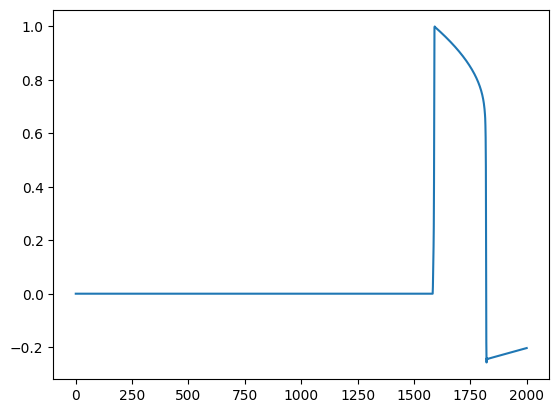

In [ ]:
import matplotlib.pyplot as plt

# plot the stored dataset to see if it makes sense

for i in range(1): # grid_size[0]
    for j in range(1): # grid_size[1]
        plt.plot(range(MS.num_it+1),dataset[0][:,i,j,0])
        plt.show()